# HW2 Applied ML - Omer Shadmi 327722575

### Description of the task

In this task we get a dataset about the titanic. Our goal is to predict the destiny of the passenger (survived or not) based on his/her attributes. 

Our data contains two parts; the training set and the test set. We need to train different classification models on the training set, and then test them on the test set, and choose the best one. 

Before getting started, we will take a look on our dataset in order to get a better understanding

To do that, we will first import the relevant libraries.

In [2]:
# Importing some libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In addition, let's understand the **definitions of our variables:**
* **PassengerId:** a unique identifier for each passenger
* **Survived:** that's the target, 0 means the passenger did not survive, while 1 means he/she
survived.
* **Pclass:** passenger class.
* **Name:** passenger name.
* **Sex:** passenger gender (0=man, 1=woman).
* **Age:** passenger age.
* **SibSp:** how many siblings & spouses of the passenger aboard the Titanic.
* **Parch:** how many children & parents of the passenger aboard the Titanic.
* **Ticket:** ticket id.
* **Fare:** price paid (in pounds).
* **Cabin:** passenger's cabin number.
* **Embarked:** where the passenger embarked the Titanic (C=Cherbourg, Q=Queenstown,
S=Southampton).
* **Body:** recovered bodies number.
* **Cabin:** cabin number. 
* **Boat:** lifeboat number. 

***

## Playing with the data

### General statistics

In [3]:
# Define the path to the Parquet file
train_file_path = r"C:\Users\shadm\Documents\data\train.parquet"
test_file_path = r"C:\Users\shadm\Documents\data\test.parquet"

# Read the Parquet file
df = pd.read_parquet(train_file_path)
df_test = pd.read_parquet(test_file_path)

In [5]:
df.head()

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,survived,ticket
199,-1,C,-1,Unknown,0,15.2458,Unknown,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,2661
706,12,C,-1,Unknown,0,11.2417,Unknown,"Nicola-Yarred, Master. Elias",0,2,0,1,1,2651
555,18,Unknown,-1,Unknown,2,13.0000,"Kontiolahti, Finland / Detroit, MI","Hiltunen, Miss. Marta",1,1,1,1,0,250650
382,37,Unknown,-1,Unknown,2,9.5875,Unknown,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,4135
316,41,Unknown,-1,Unknown,2,39.6875,Unknown,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,3101295


In [6]:
df.shape

(1047, 14)

In [7]:
df.describe()

,age,body,embarked,fare,parch,pclass,sex,sibsp,survived
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,23.640879,13.319962,1.512894,31.651489,0.366762,1.303725,0.353391,0.511939,0.382999
std,17.842871,54.048716,0.806034,47.499115,0.814052,0.832775,0.478251,1.071801,0.486350
min,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,-1.000000,1.000000,7.895800,0.000000,1.000000,0.000000,0.000000,0.000000
50%,24.000000,-1.000000,2.000000,14.400000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,35.000000,-1.000000,2.000000,30.500000,0.000000,2.000000,1.000000,1.000000,1.000000
max,80.000000,328.000000,3.000000,512.329224,9.000000,2.000000,1.000000,8.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 199 to 225
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1047 non-null   int64  
 1   boat       1047 non-null   object 
 2   body       1047 non-null   int32  
 3   cabin      1047 non-null   object 
 4   embarked   1047 non-null   int64  
 5   fare       1047 non-null   float32
 6   home.dest  1047 non-null   object 
 7   name       1047 non-null   object 
 8   parch      1047 non-null   int32  
 9   pclass     1047 non-null   int64  
 10  sex        1047 non-null   int64  
 11  sibsp      1047 non-null   int32  
 12  survived   1047 non-null   int64  
 13  ticket     1047 non-null   object 
dtypes: float32(1), int32(3), int64(5), object(5)
memory usage: 106.3+ KB


In [10]:
df_test.head()

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,survived,ticket
670,64,Unknown,263,Unknown,2,26.0000,"Isle of Wight, England","Nicholson, Mr. Arthur Ernest",0,0,0,0,0,693
251,48,14,-1,Unknown,2,36.7500,"St Ives, Cornwall / Hancock, MI","Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",2,1,1,0,1,C.A. 33112
1225,35,Unknown,-1,Unknown,1,12.3500,Unknown,"Keane, Mr. Daniel",0,1,0,0,0,233734
300,19,Unknown,-1,C23 C25 C27,2,263.0000,"Winnipeg, MB","Fortune, Mr. Charles Alexander",2,0,0,3,0,19950
352,4,15,-1,Unknown,2,11.1333,Unknown,"Johnson, Master. Harold Theodor",1,2,0,1,1,347742


In [11]:
df_test.shape

(262, 14)

In [12]:
df_test.describe()

,age,body,embarked,fare,parch,pclass,sex,sibsp,survived
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,23.725191,16.503817,1.423664,39.734257,0.458015,1.259542,0.366412,0.446565,0.377863
std,18.003854,60.737028,0.853151,65.767952,1.045036,0.858474,0.482746,0.911300,0.485781
min,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,-1.000000,1.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,-1.000000,2.000000,15.372900,0.000000,2.000000,0.000000,0.000000,0.000000
75%,36.000000,-1.000000,2.000000,36.750000,1.000000,2.000000,1.000000,1.000000,1.000000
max,65.000000,327.000000,2.000000,512.329224,9.000000,2.000000,1.000000,8.000000,1.000000


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 670 to 1305
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        262 non-null    int64  
 1   boat       262 non-null    object 
 2   body       262 non-null    int32  
 3   cabin      262 non-null    object 
 4   embarked   262 non-null    int64  
 5   fare       262 non-null    float32
 6   home.dest  262 non-null    object 
 7   name       262 non-null    object 
 8   parch      262 non-null    int32  
 9   pclass     262 non-null    int64  
 10  sex        262 non-null    int64  
 11  sibsp      262 non-null    int32  
 12  survived   262 non-null    int64  
 13  ticket     262 non-null    object 
dtypes: float32(1), int32(3), int64(5), object(5)
memory usage: 26.6+ KB


***

## Understanding the Features

We will try to detect the missing values of each variable.

In [14]:
df.head()

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,survived,ticket
199,-1,C,-1,Unknown,0,15.2458,Unknown,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,2661
706,12,C,-1,Unknown,0,11.2417,Unknown,"Nicola-Yarred, Master. Elias",0,2,0,1,1,2651
555,18,Unknown,-1,Unknown,2,13.0000,"Kontiolahti, Finland / Detroit, MI","Hiltunen, Miss. Marta",1,1,1,1,0,250650
382,37,Unknown,-1,Unknown,2,9.5875,Unknown,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,4135
316,41,Unknown,-1,Unknown,2,39.6875,Unknown,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,3101295


The missing value "key" for each column (if exist):
* age: -1
* boat: Unknown
* body: -1
* cabin: Unknown
* home.dest: Unknown

By previous stat, there isn't a NaN value in the whole data. 

For each column, we will replace the missing value with NaN value, count them, and deal with them.

In [4]:
def clean_titanic_data(df):

    # Replace missing values with NaN
    df['age'] = df['age'].replace(-1, np.nan)
    df['boat'] = df['boat'].replace('Unknown', np.nan)
    df['body'] = df['body'].replace(-1, np.nan)
    df['cabin'] = df['cabin'].replace('Unknown', np.nan)
    df['home.dest'] = df['home.dest'].replace('Unknown', np.nan)

    return df

In [5]:
cleaned_df = clean_titanic_data(df)
cleaned_df.head()

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,survived,ticket
199,NaN,C,NaN,NaN,0,15.2458,NaN,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,2661
706,12.0,C,NaN,NaN,0,11.2417,NaN,"Nicola-Yarred, Master. Elias",0,2,0,1,1,2651
555,18.0,NaN,NaN,NaN,2,13.0000,"Kontiolahti, Finland / Detroit, MI","Hiltunen, Miss. Marta",1,1,1,1,0,250650
382,37.0,NaN,NaN,NaN,2,9.5875,NaN,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,4135
316,41.0,NaN,NaN,NaN,2,39.6875,NaN,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,3101295


In [6]:
# doing the same to the testing data
df_test = clean_titanic_data(df_test)

Now, we can easily see how many missing values we have, for each variable.

In [24]:
def calculate_missing_proportions(df):
    # Calculate the number of missing values in each column
    missing_values = df.isnull().sum()
    
    # Calculate the proportion of missing values
    missing_proportions = missing_values / len(df)
    
    # Create a DataFrame with the results, sorted by proportion in descending order
    missing_df = pd.DataFrame({
        'column': missing_proportions.index,
        'proportion_missing': missing_proportions.values
    }).sort_values('proportion_missing', ascending=False)
    
    # Format the proportion as a percentage
    missing_df['percentage_missing'] = missing_df['proportion_missing'].map("{:.2%}".format)
    
    return missing_df

In [36]:
calculate_missing_proportions(cleaned_df)

,column,proportion_missing,percentage_missing
2,body,0.910220,91.02%
3,cabin,0.783190,78.32%
1,boat,0.625597,62.56%
6,home.dest,0.423114,42.31%
0,age,0.194842,19.48%
4,embarked,0.000000,0.00%
5,fare,0.000000,0.00%
7,name,0.000000,0.00%
8,parch,0.000000,0.00%
9,pclass,0.000000,0.00%


As we can see, we got 4 variables with **a lot** of missing values in them. Therfore, they become useless for our goal of learning the training data, and we will simply remove them. The 'age' variable have 19% of missing values, which isn't the best, but we can live with it, and we will see how we will tackle this problem.

### Missing Values

In [7]:
# Remove columns with too many missing values
columns_to_remove = ['body', 'cabin', 'boat', 'home.dest']
cleaned_df = cleaned_df.drop(columns=columns_to_remove)

cleaned_df.head()

,age,embarked,fare,name,parch,pclass,sex,sibsp,survived,ticket
199,NaN,0,15.2458,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,2661
706,12.0,0,11.2417,"Nicola-Yarred, Master. Elias",0,2,0,1,1,2651
555,18.0,2,13.0000,"Hiltunen, Miss. Marta",1,1,1,1,0,250650
382,37.0,2,9.5875,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,4135
316,41.0,2,39.6875,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,3101295


In [8]:
# Doing the same to the testing df
df_test = df_test.drop(columns=columns_to_remove)

Let's make sure that we got rid of all the negative values, we will use a function to detect them.

In [40]:
def detect_negative_values(df):
    negative_values_info = {}
    
    for column in df.columns:
        # Check if the column contains numeric values
        if pd.api.types.is_numeric_dtype(df[column]):
            # Count the number of negative values
            negative_count = (df[column] < 0).sum()
            if negative_count > 0:
                negative_values_info[column] = negative_count
    
    return pd.DataFrame(list(negative_values_info.items()), columns=['Column', 'Negative Value Count'])

In [42]:
# In our df
detect_negative_values(cleaned_df)

,Column,Negative Value Count
0,fare,1


In [43]:
# In the testing df
detect_negative_values(df_test)

,Column,Negative Value Count


We got one negative value on 'fare' column in our df, we will remove it

In [9]:
# Remove the row with the negative fare value
cleaned_df = cleaned_df[cleaned_df['fare'] >= 0]

We are moving on to deal with the 'age' variable.

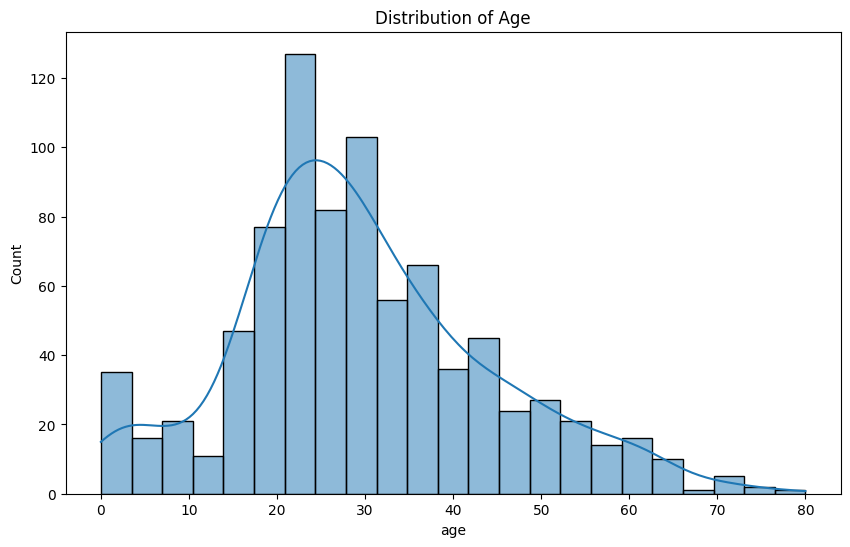

In [39]:
# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.show()

The 'age' distribution reminds a normal one, but we have quite a lot babies, which ruins our normality. Thus, this time we will skip the common 'mean/median' method for missing values, and use more sophisticated option instead. 

We will predict the age, based on the other, most correlated (with age) variables.

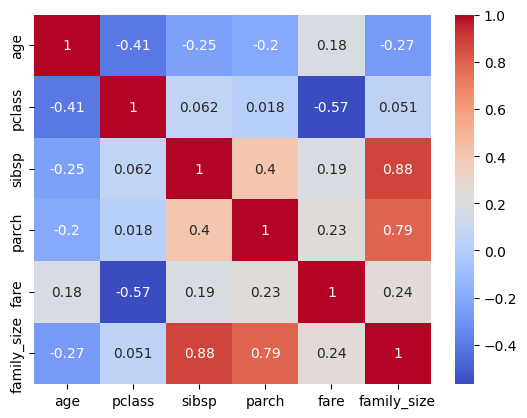

In [10]:
# Feature engineering
cleaned_df['family_size'] = cleaned_df['sibsp'] + cleaned_df['parch']
cleaned_df['title'] = cleaned_df['name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Correlation analysis
corr_matrix = cleaned_df[['age', 'pclass', 'sibsp', 'parch', 'fare', 'family_size']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
# Prepare data for model-based feature importance
cleaned_df = pd.get_dummies(cleaned_df, columns=['title'], drop_first=True)
features = ['pclass', 'sibsp', 'parch', 'fare', 'family_size'] + [col for col in cleaned_df.columns if 'title_' in col]

# Split the data into training and prediction sets
train_data = cleaned_df[cleaned_df['age'].notnull()]
predict_data = cleaned_df[cleaned_df['age'].isnull()]

# Train the decision tree regressor
X_train = train_data[features]
y_train = train_data['age']
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [12]:
# Feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': regressor.feature_importances_})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
print(feature_importance)

# Choose top features based on importance
top_features = feature_importance[feature_importance['importance'] > 0.05]['feature'].tolist()

# Train the final regression model with top features
final_regressor = LinearRegression()
final_regressor.fit(X_train[top_features], y_train)

           feature  importance
3             fare    0.284204
0           pclass    0.225935
10      title_Miss    0.152539
9     title_Master    0.149964
2            parch    0.091110
4      family_size    0.031399
13        title_Mr    0.020900
1            sibsp    0.020514
11      title_Mlle    0.005701
8         title_Dr    0.005260
16       title_Rev    0.004716
14       title_Mrs    0.002333
17       title_Sir    0.002031
5        title_Col    0.001942
7        title_Don    0.001313
15        title_Ms    0.000139
6   title_Countess    0.000000
12       title_Mme    0.000000


LinearRegression()

In [13]:
# Predict missing age values
X_predict = predict_data[top_features]
predicted_ages = final_regressor.predict(X_predict)

# Impute the missing values with predicted values
cleaned_df.loc[cleaned_df['age'].isnull(), 'age'] = predicted_ages

Same process for testing df.

In [14]:
# Feature engineering
df_test['family_size'] = df_test['sibsp'] + df_test['parch']
df_test['title'] = df_test['name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Prepare data for model-based feature importance
df_test = pd.get_dummies(df_test, columns=['title'], drop_first=True)
features = ['pclass', 'sibsp', 'parch', 'fare', 'family_size'] + [col for col in df_test.columns if 'title_' in col]

# Split the data into training and prediction sets
train_data = df_test[df_test['age'].notnull()]
predict_data = df_test[df_test['age'].isnull()]

# Train the decision tree regressor
X_train = train_data[features]
y_train = train_data['age']
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': regressor.feature_importances_})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Choose top features based on importance
top_features = feature_importance[feature_importance['importance'] > 0.05]['feature'].tolist()

# Train the final regression model with top features
final_regressor = LinearRegression()
final_regressor.fit(X_train[top_features], y_train)

# Predict missing age values
X_predict = predict_data[top_features]
predicted_ages = final_regressor.predict(X_predict)

# Impute the missing values with predicted values
df_test.loc[df_test['age'].isnull(), 'age'] = predicted_ages

In [15]:
relevant_columns = ['age', 'embarked', 'fare', 'name', 'pclass', 'sex', 'survived', 'ticket', 'family_size']
cleaned_df = cleaned_df[relevant_columns]
df_test = df_test[relevant_columns]

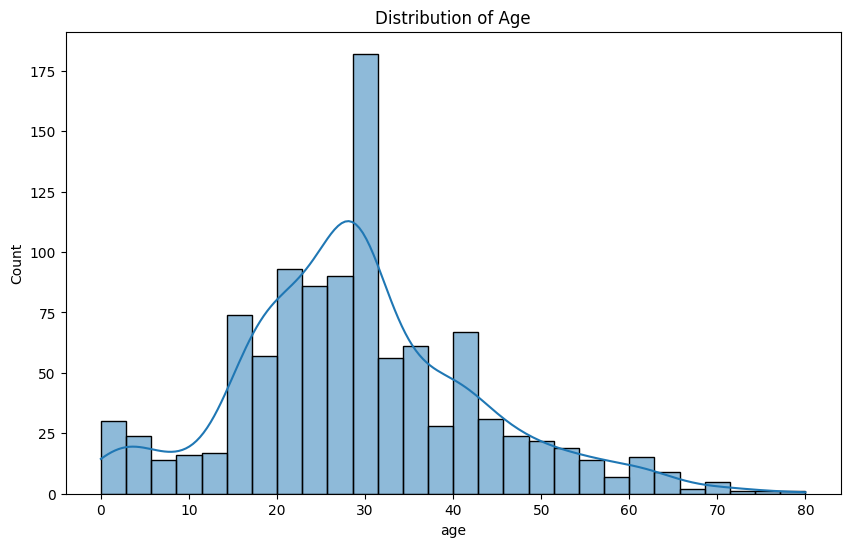

In [16]:
# Updated distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.show()

The updated distribution of 'age' is okay, that is, pretty similiar to the previous one.

### Outliers

We can already remove the 'ticket' and 'name' columns because they won't tell us something interesting.

In [62]:
cleaned_df = cleaned_df.drop(columns=['name', 'ticket'])
df_test = df_test.drop(columns=['name', 'ticket'])

In [59]:
def detect_outliers_iqr(df):
    outlier_dict = {}  # To store outliers and their counts for each column
    for column in df.columns:  
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR

        # Identifying outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        if not outliers.empty:
            outlier_dict[column] = {'outliers': outliers.tolist(), 'count': len(outliers)}
        else:
            outlier_dict[column] = {'outliers': "No outliers detected", 'count': 0}

    return outlier_dict

In [63]:
outliers_dict = detect_outliers_iqr(cleaned_df)

print("Number of Outliers from IQR method:")
for column, info in outliers_dict.items():
    print(f"{column}: {info['count']}")

for column, info in outliers_dict.items():
        print(f"Outliers from IQR method for {column}: {info}")

Number of Outliers from IQR method:
age: 36
embarked: 0
fare: 131
pclass: 0
sex: 0
survived: 0
family_size: 97
Outliers from IQR method for age: {'outliers': [63.0, 59.0, 60.0, 64.0, 62.0, 67.0, 74.0, 62.0, 60.0, 63.0, 60.0, 59.0, 70.0, 61.0, 80.0, 76.0, 60.0, 63.0, 64.0, 62.0, 64.0, 62.0, 60.0, 70.0, 61.0, 61.0, 66.0, 70.0, 71.0, 63.0, 65.0, 65.0, 60.0, 61.0, 61.0, 71.0], 'count': 36}
Outliers from IQR method for embarked: {'outliers': 'No outliers detected', 'count': 0}
Outliers from IQR method for fare: {'outliers': [211.5, 78.2667007446289, 135.63330078125, 110.88330078125, 89.10420227050781, 65.0, 81.8582992553711, 69.55000305175781, 76.72920227050781, 86.5, 79.19999694824219, 79.6500015258789, 135.63330078125, 133.64999389648438, 211.33749389648438, 69.30000305175781, 75.25, 77.2874984741211, 90.0, 151.5500030517578, 211.33749389648438, 76.29170227050781, 135.63330078125, 110.88330078125, 83.1583023071289, 263.0, 151.5500030517578, 73.5, 69.55000305175781, 86.5, 79.19999694824219

We can't see any interesting outliers, that is, there are mathematically outliers, but they are not really exceptional. So we gonna keep them.

In [65]:
df = cleaned_df

We are now ready to prepare the data for models!

***

## Correlations and Visualisations

In order to maximize the effectiveness of our models, we want to train our models only on the most correlative features to 'survived'. That is, the most important feautires for our predictions. 

So, we are going to look now how each feature affect the target variable 'survived'. 

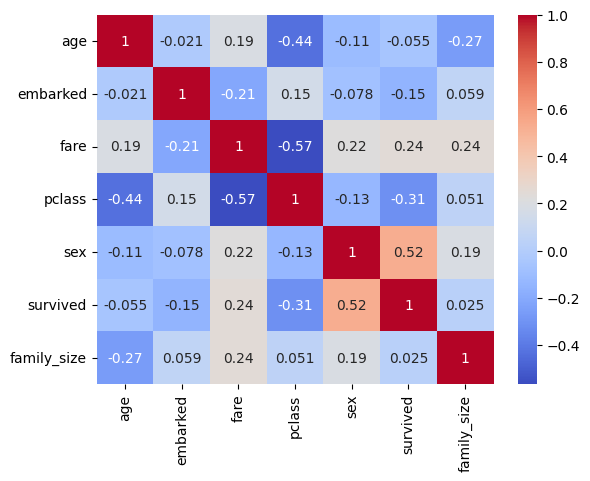

survived       1.000000
sex            0.522924
pclass        -0.313018
fare           0.243138
embarked      -0.154894
age           -0.055440
family_size    0.025164
Name: survived, dtype: float64


In [70]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

survived_correlations = corr_matrix['survived']

# Sort by the absolute value of the correlation
sorted_correlations = survived_correlations.abs().sort_values(ascending=False)

# Reorder by the original correlation values
final_correlations = survived_correlations.loc[sorted_correlations.index]

print(final_correlations)

- We see that the most important features are: 'sex', 'pclass', 'fare' and 'embarked'. The features 'age' and 'family_size' do correlate but aren't very important. 

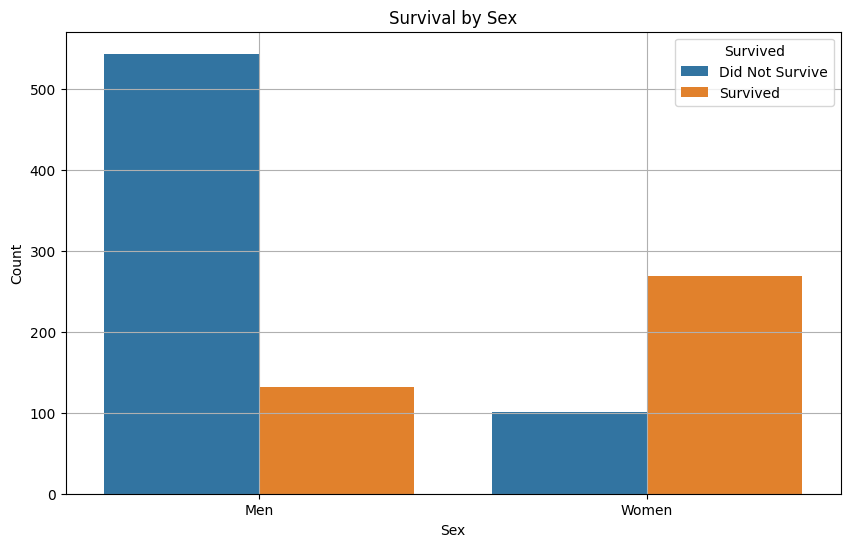

In [80]:
# Show survive vs. sex
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='sex', hue='survived')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])

# Set x-axis labels
ax.set_xticks([0, 1])  # Ensure ticks are set at the correct positions
ax.set_xticklabels(['Men', 'Women'])

plt.grid(True)

plt.show()

* We can see that women were more likely to survive. 

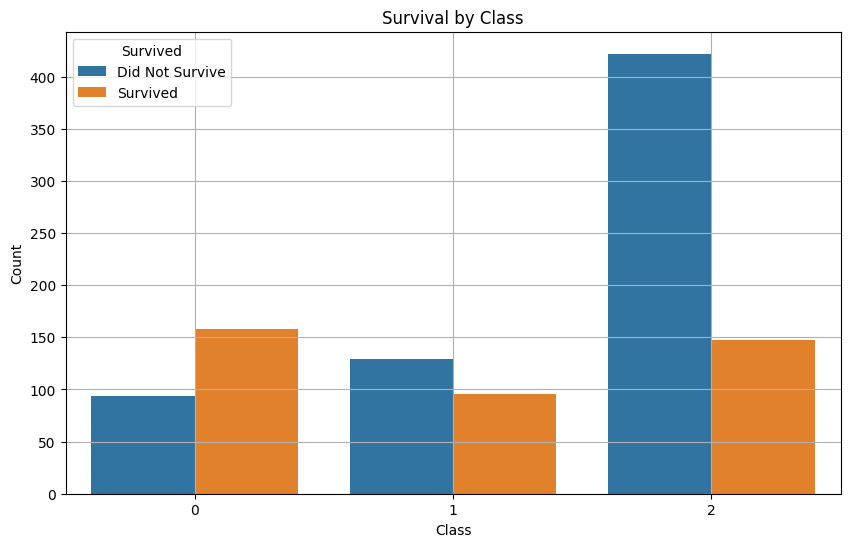

In [79]:
# Show survive vs. pclass
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='pclass', hue='survived')
plt.title('Survival by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.grid(True)
plt.show()

* Here, the higher quality classes were far more likely to survive. 

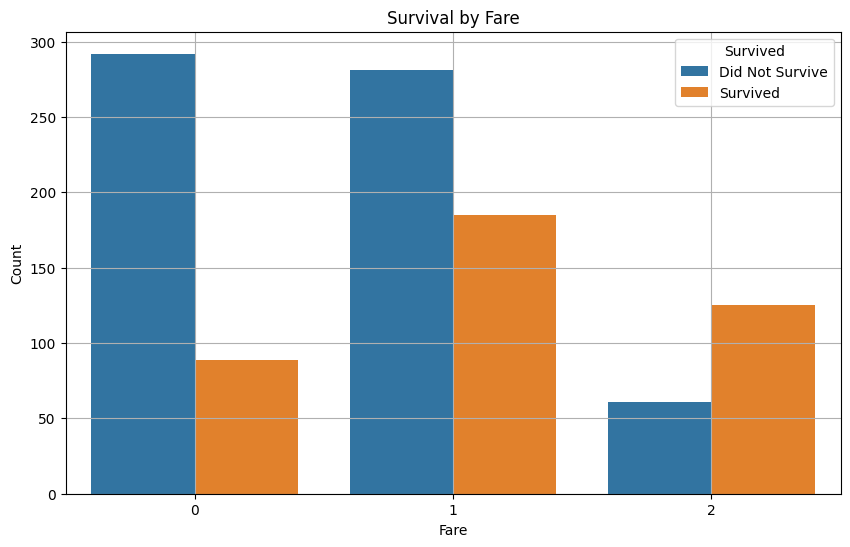

In [75]:
fare_bins = [0, 10, 50, np.inf]
fare_labels = ['0', '1', '2']

# Create a new column 'FareCategory' in the dataset
df['fare_category'] = pd.cut(df['fare'], bins=fare_bins, labels=fare_labels)

# plot to see fare_Categories vs. Survival
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fare_category', hue='survived', order=fare_labels)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Survival by Fare')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.grid(True)
plt.show()

* Again, those who paid more had better chances to survive. 

In [77]:
df = df.drop(columns=['fare_category'])

In [82]:
unique_values = df['embarked'].unique()
print(unique_values)

[0 2 1 3]


In [83]:
# Find rows where 'embarked' is 3
rows_with_value_3 = df[df['embarked'] == 3]
print(rows_with_value_3)

      age  embarked  fare  pclass  sex  survived  family_size
772  62.0         3  80.0       0    1         1            0
442  38.0         3  80.0       0    1         1            0


We got some unkonwn place that 2 women came from, I don't really know whether it a mistake or not, but we will remove them. 

In [85]:
df = df[df['embarked'] != 3]

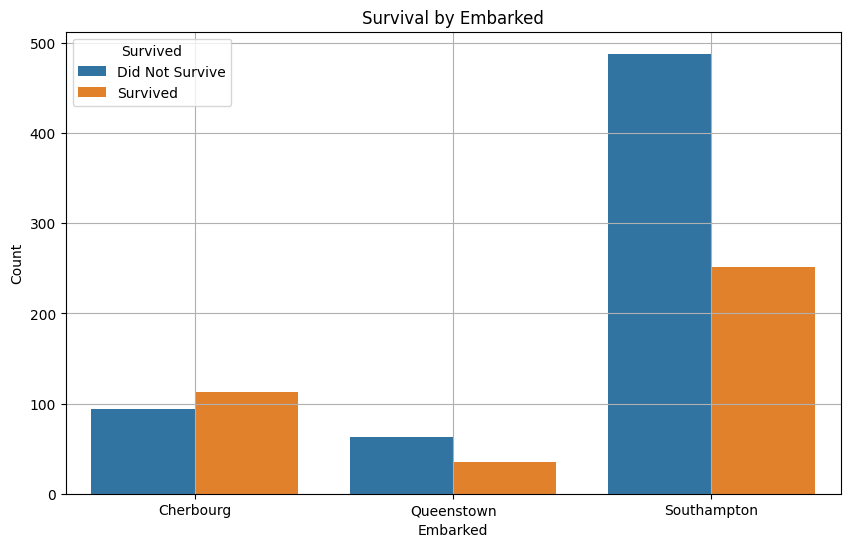

In [87]:
# Show survive vs. embarked
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='embarked', hue='survived')
plt.title('Survival by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])

# Set x-axis labels
ax.set_xticks([0, 1, 2])  # Ensure ticks are set at the correct positions
ax.set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'])

plt.grid(True)

plt.show()

* The people from Cherbourg had the best chances, then the people of Queenstown, and the people who got on the boat in Southampton had the worst chances of surviving. 

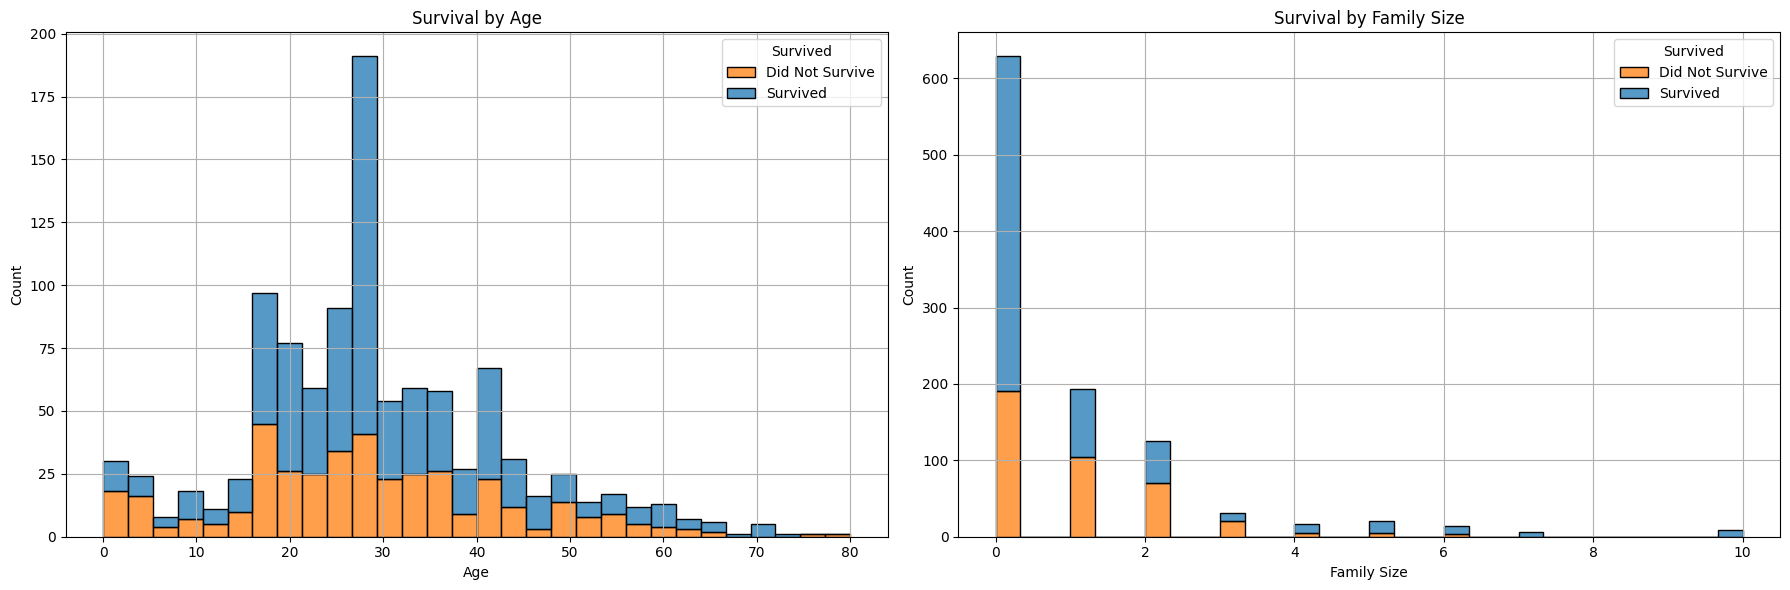

In [89]:
# Create a figure with two subplots
plt.figure(figsize=(18, 6))

# Plot 1: Survival by Age
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='age', hue='survived', multiple='stack', bins=30)
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.grid(True)

# Plot 2: Survival by family_size
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='family_size', hue='survived', multiple='stack', bins=30)
plt.title('Survival by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.grid(True)

plt.tight_layout()
plt.show()

* We can't see any interesting pattern there. 

We are now ready to train our models!

***

## Modeling 

In [122]:
# Importing the relevant tools
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve
np.random.seed(42) 

We split the df to train and test. We remember we want to predict the columns 'survived'.

In [93]:
X = df.drop(columns=['survived'])
y = df['survived']

# Spliting the data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We have learnd some models, such like: Logistic Regression, SoftMax, Decision Tree, Regression Tree, Bagging, Random Forests, Gradient Boosting, XGBoost, etc. 

But, we will try here just the ones that suitable for our task, which is, binary classification. 

Therefore, we will train and compare the next models: Logistic Regression, Decision Tree, Random Forest, Gradient Boosting and XGBoost. 

In order to do so, we will use the next tools: 

1. **Precision:** This is the ratio of correctly predicted positive observations to the total predicted positives. It is the accuracy of the positive predictions.
2. **Recall:** This is the ratio of correctly predicted positive observations to all the observations in the actual class. It is also known as Sensitivity or True Positive Rate.
3. **F1-Score:** This is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is especially useful when you have an uneven class distribution.
4. **Support:** This is the number of actual occurrences of the class in the dataset.
5. **Accuracy:** This is the ratio of correctly predicted observations to the total observations.
6. **Macro Average:** This is the unweighted mean of the precision, recall, and F1-score for each class. It does not take class imbalance into account.
7. **Weighted Average:** This is the weighted mean of the precision, recall, and F1-score, taking the support (the number of true instances for each label) into account. It adjusts for class imbalance.

We will also use:
* **Confusion Matrix:** The confusion matrix is a table used to evaluate the performance of a classification model. It compares the predicted classes with the actual classes, providing a clear summary of classification results.
* **ROC Curve:** The Receiver Operating Characteristic (ROC) curve is a graphical representation of a classification model's performance across different thresholds. It plots the True Positive Rate (TPR or Recall) against the False Positive Rate (FPR) at various threshold settings.

All of this methods will help us to evaluate the results of each classifier. 

***

### Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       134
           1       0.70      0.75      0.72        75

    accuracy                           0.79       209
   macro avg       0.78      0.78      0.78       209
weighted avg       0.80      0.79      0.80       209



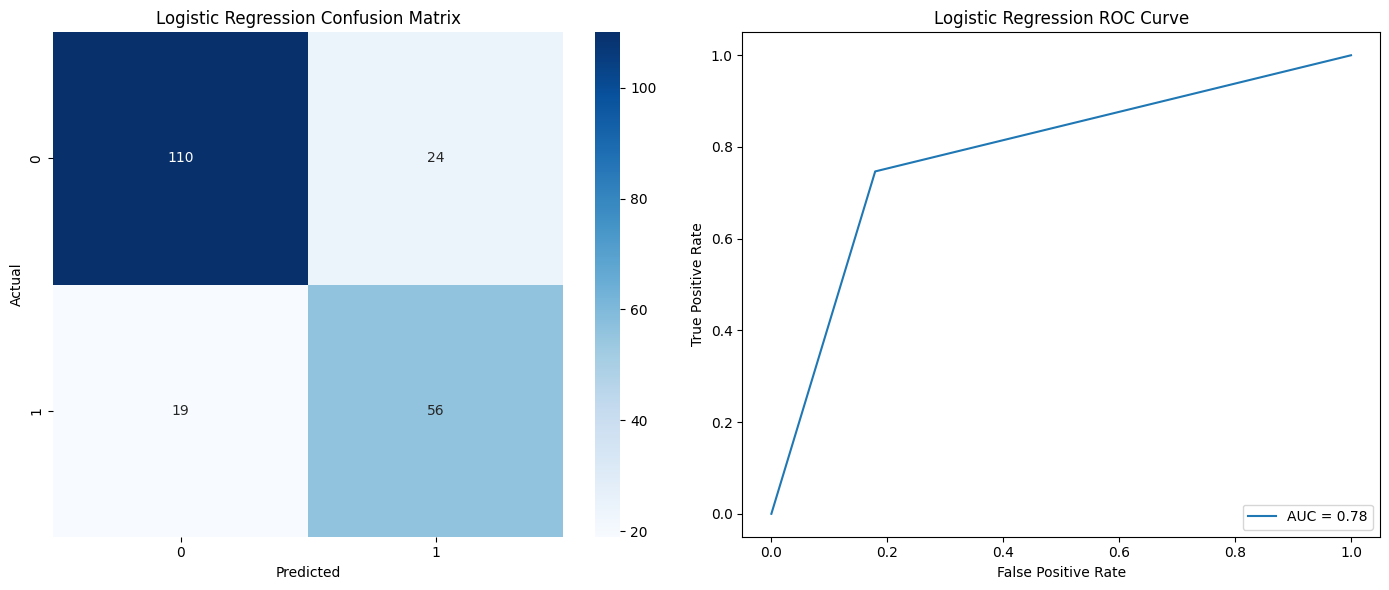

In [95]:
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Logistic Regression Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

ax[1].plot(fpr, tpr, label=f"AUC = {auc:.2f}")
ax[1].set_title('Logistic Regression ROC Curve')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

Great job of the Logistic Regression!

***

### Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       134
           1       0.62      0.71      0.66        75

    accuracy                           0.74       209
   macro avg       0.72      0.73      0.72       209
weighted avg       0.75      0.74      0.74       209



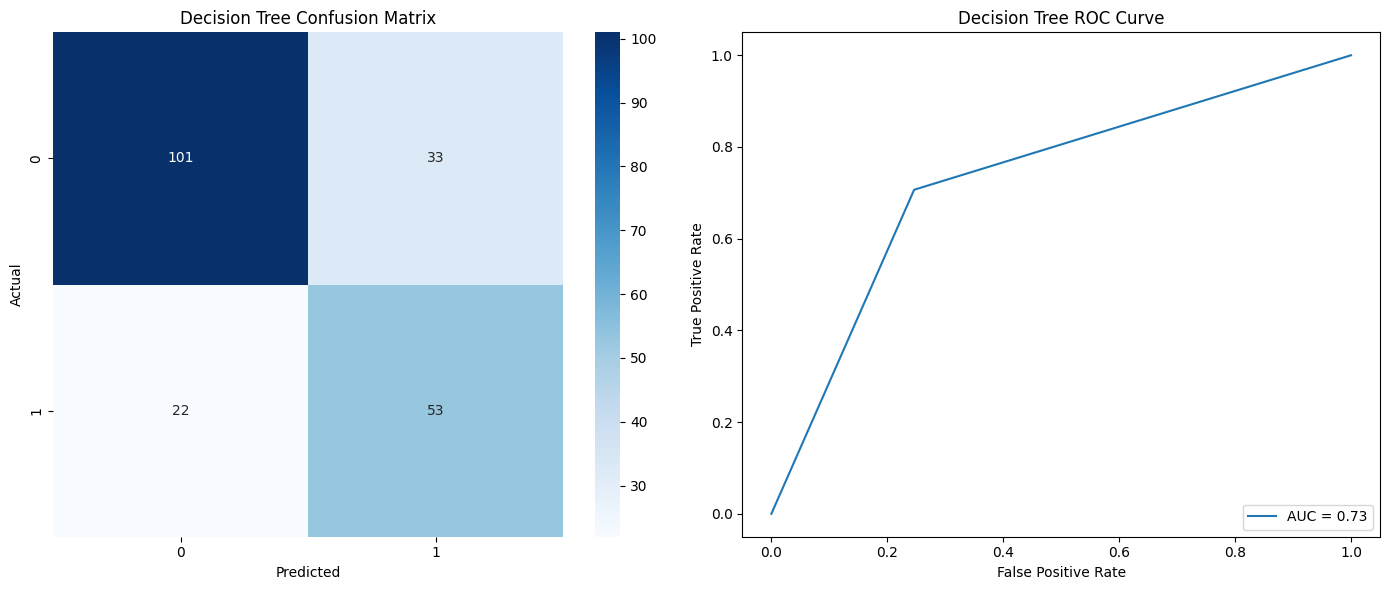

In [97]:
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Decision Tree Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

ax[1].plot(fpr, tpr, label=f"AUC = {auc:.2f}")
ax[1].set_title('Decision Tree ROC Curve')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

Okay job of the Decision Tree model...

***

### Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       134
           1       0.67      0.75      0.70        75

    accuracy                           0.78       209
   macro avg       0.76      0.77      0.76       209
weighted avg       0.78      0.78      0.78       209



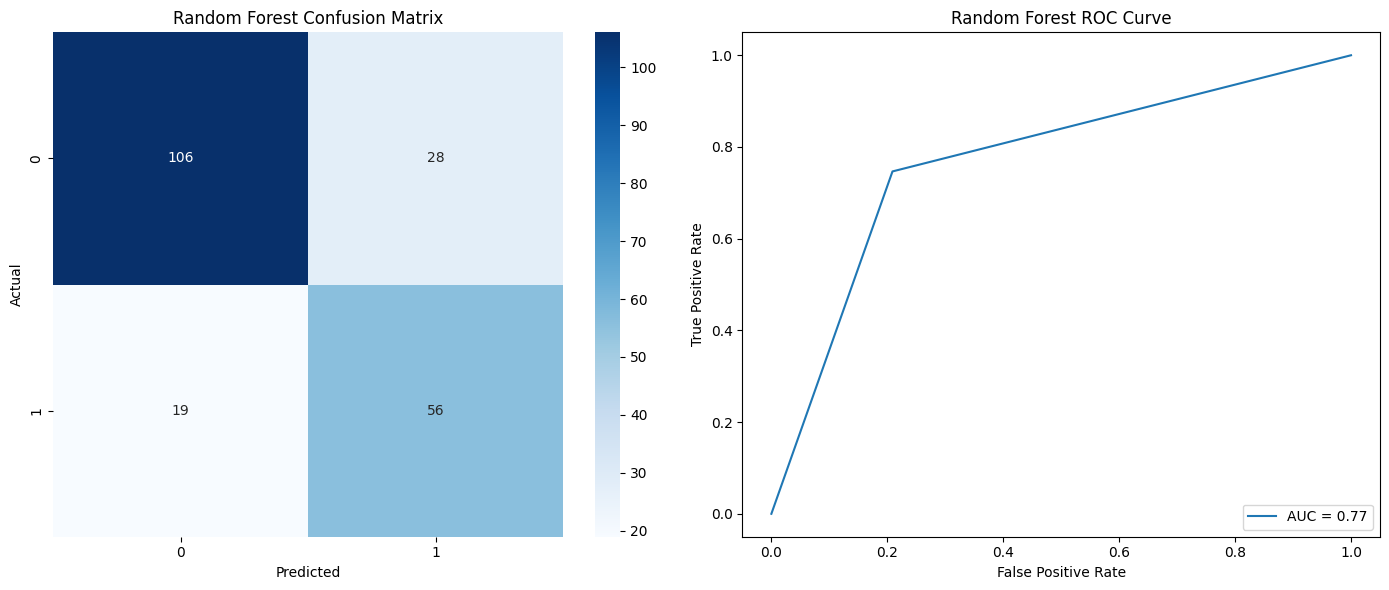

In [101]:
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Random Forest Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

ax[1].plot(fpr, tpr, label=f"AUC = {auc:.2f}")
ax[1].set_title('Random Forest ROC Curve')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

Good job of the Random Forest model.

***

### Gradient Boosting

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       134
           1       0.73      0.69      0.71        75

    accuracy                           0.80       209
   macro avg       0.78      0.78      0.78       209
weighted avg       0.80      0.80      0.80       209



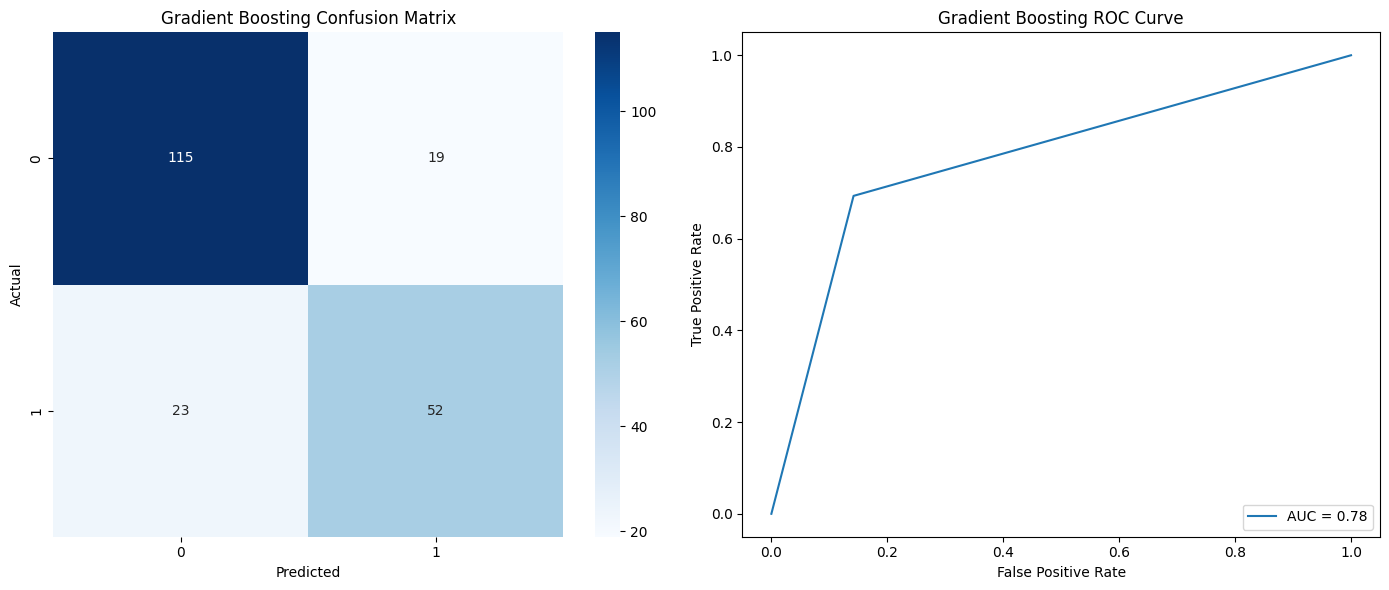

In [103]:
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Gradient Boosting Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

ax[1].plot(fpr, tpr, label=f"AUC = {auc:.2f}")
ax[1].set_title('Gradient Boosting ROC Curve')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

Excellent job of the Gradient Boosting model!!!

***

### XGBoost

In [110]:
from xgboost import XGBClassifier
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = xgb_model.predict(X_test)

# Print the classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       134
           1       0.68      0.69      0.69        75

    accuracy                           0.78       209
   macro avg       0.76      0.76      0.76       209
weighted avg       0.78      0.78      0.78       209



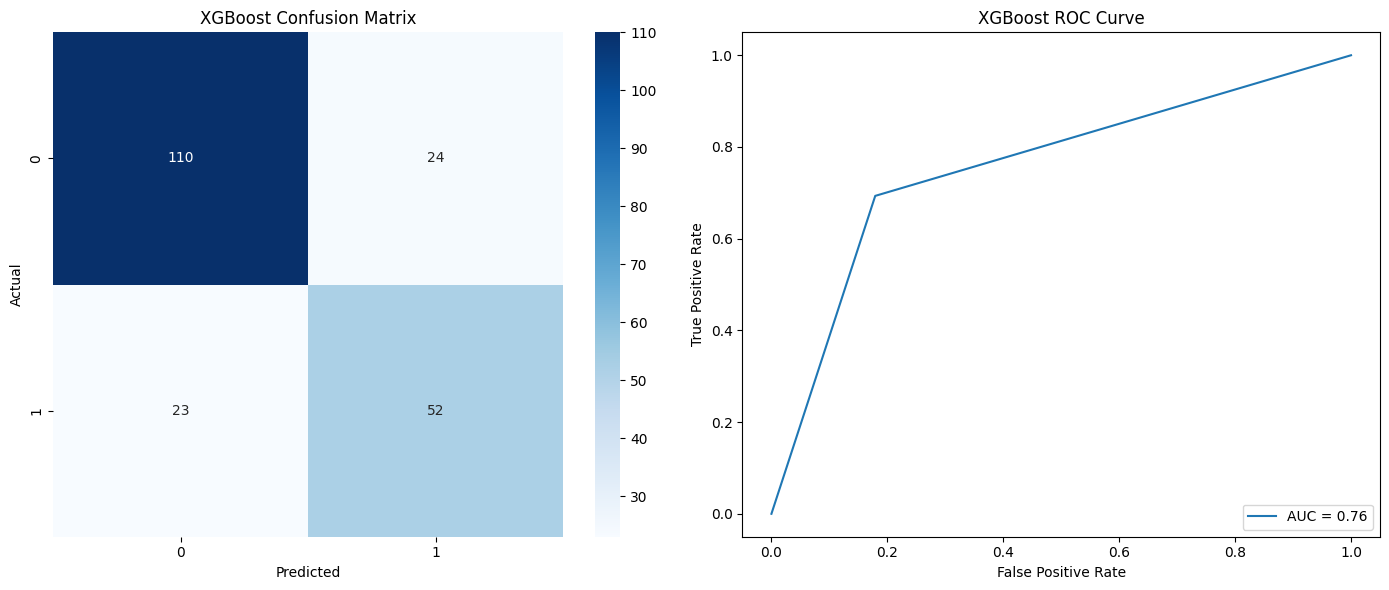

In [111]:
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('XGBoost Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

ax[1].plot(fpr, tpr, label=f"AUC = {auc:.2f}")
ax[1].set_title('XGBoost ROC Curve')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

Good job of the XGBoost model.

***

**We have trained all those classifiers, but which of them is the best?**

We will use cross-validation in order to determine which model is the best for our task. 

### Cross Validation

In [112]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# our models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss')
}

# Evaluate each model using cross-validation
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    results[name] = np.mean(cv_scores)

# the results for each model 
for name, score in results.items():
    print(f"{name}: Average accuracy = {score:.2f}")

# Determine which one of our models is the best model
best_model = max(results, key=results.get)
print(f"Best model: {best_model} with an average accuracy of {results[best_model]:.2f}")

Logistic Regression: Average accuracy = 0.78
Decision Tree: Average accuracy = 0.74
Random Forest: Average accuracy = 0.77
Gradient Boosting: Average accuracy = 0.80
XGBoost: Average accuracy = 0.78
Best model: Gradient Boosting with an average accuracy of 0.80


**And the winner is... Gradient Boosting!!!**

Now we will do Hyperparameter Tuning on the Gradient Boosting model in order to get the best results on our test df. 

***

### Hyperparameter Tuning

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV with StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, 
                           cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy: 0.82


In [115]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Classification Report for the best Gradient Boosting model:")
print(classification_report(y_test, y_pred))

Classification Report for the best Gradient Boosting model:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       134
           1       0.72      0.72      0.72        75

    accuracy                           0.80       209
   macro avg       0.78      0.78      0.78       209
weighted avg       0.80      0.80      0.80       209



We have found the best parameters for the best classifier, Gradient Boosting, now we just need to train it on our test data and evaluate its results.

### Test Data 

In [117]:
# Preparing the test data
X_new = df_test.drop(columns=['survived'])
y_new = df_test['survived']

In [118]:
# Split the new data into training and testing sets
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [121]:
# Train the improved Gradient Boosting model on the new data
best_params = {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

improved_gb_model = GradientBoostingClassifier(**best_params)
improved_gb_model.fit(X_new_train, y_new_train)

y_new_pred = improved_gb_model.predict(X_new_test)
print("Classification Report for the improved Gradient Boosting model on new data:")
print(classification_report(y_new_test, y_new_pred))

Classification Report for the improved Gradient Boosting model on new data:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        33
           1       0.61      0.70      0.65        20

    accuracy                           0.72        53
   macro avg       0.70      0.71      0.71        53
weighted avg       0.73      0.72      0.72        53



**In concusion, the improved Gradient Boosting model did quite good job also on the test data.**